In [1]:
from Binet import *
from Strassen import *
from helpers import *
from stats import *
import pandas as df
df.set_option('display.width', None)
df.set_option('display.max_columns', None)

In [ ]:
A = random_matrix(7, 7)
B = random_matrix(7, 7)

In [ ]:

functions = [binet_two_split_benchmark, binet_without_padding_benchmark, strassen_without_padding_benchmark, numpy_benchmark]
names = ["Binet dzielenie na 2", "Binet bez paddingu", "Strassen bez paddingu", "Wbudowane"]

<div style="text-align: begin; font-size:23px;">
    <b>Algorytm Bineta</b><br>
    Pseudokod rekurencyjny
</div>

```text
    Algorithm BINET(A, B):
    if size(A) = 1 then
        return A * B

    Divide X into quadrants:
    X11 ← X[1 : n/2, 1 : k/2]
    X12 ← X[1 : n/2, k/2+1 : k]
    X21 ← X[n/2+1 : n, 1 : k/2]
    X22 ← X[n/2+1 : n, k/2+1 : k]

    Divide Y into quadrants:
    Y11 ← Y[1 : k/2, 1 : m/2]
    Y12 ← Y[1 : k/2, m/2+1 : m]
    Y21 ← Y[k/2+1 : k, 1 : m/2]
    Y22 ← Y[k/2+1 : k, m/2+1 : m]

    Compute:
    C11 = BINET(X11, Y11) + BINET(X12, Y21)
    C12 = BINET(X11, Y12) + BINET(X12, Y22)
    C21 = BINET(X21, Y11) + BINET(X22, Y21)
    C22 = BINET(X21, Y12) + BINET(X22, Y22)

    return matrix C = [C11 C12; C21 C22]
```


<div style="text-align: begin; font-size:23px;">
    <b>Algorytm Bineta</b><br>
    Najważniejsze elementy kodu
</div>

```python

def binet_without_padding(X: np.ndarray, Y: np.ndarray):
    n, k = X.shape
    _, m = Y.shape

    if min(n, k, m) == 1:
        return X @ Y
    
    n //= 2
    m //= 2
    k //= 2

    X11 = X[:n, :k]
    X12 = X[:n, k:]
    X21 = X[n:, :k]
    X22 = X[n:, k:]
    Y11 = Y[:k, :m]
    Y12 = Y[:k, m:]
    Y21 = Y[k:, :m]
    Y22 = Y[k:, m:]

    Z11 = binet_without_padding(X11, Y11) + binet_without_padding(X12, Y21)
    Z12 = binet_without_padding(X11, Y12) + binet_without_padding(X12, Y22)
    Z21 = binet_without_padding(X21, Y11) + binet_without_padding(X22, Y21)
    Z22 = binet_without_padding(X21, Y12) + binet_without_padding(X22, Y22)

    top = np.hstack((Z11, Z12), dtype=Float)
    bot = np.hstack((Z21, Z22), dtype=Float)
    return np.vstack((top, bot), dtype=Float)  
```


In [ ]:
avg_df =  create_statistics(n = 2, m = 20, k = 10, functions = [binet_without_padding_benchmark],names = ['binet'])

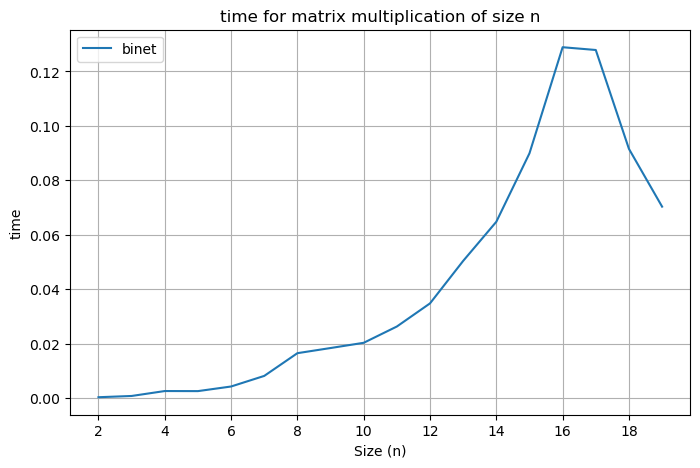

In [ ]:

plot_metric(avg_df, 'time')


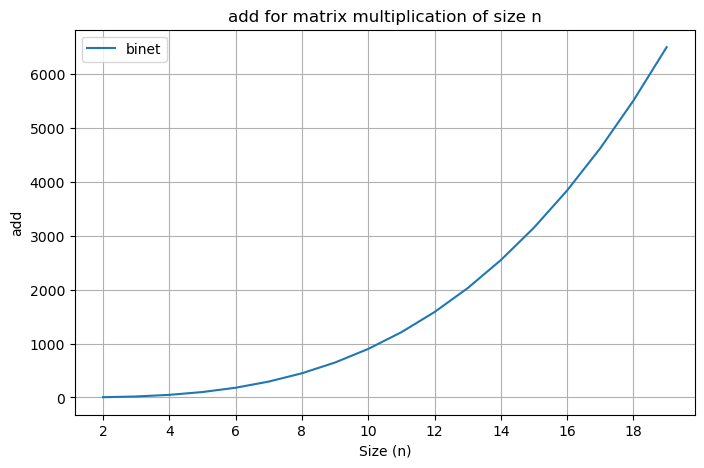

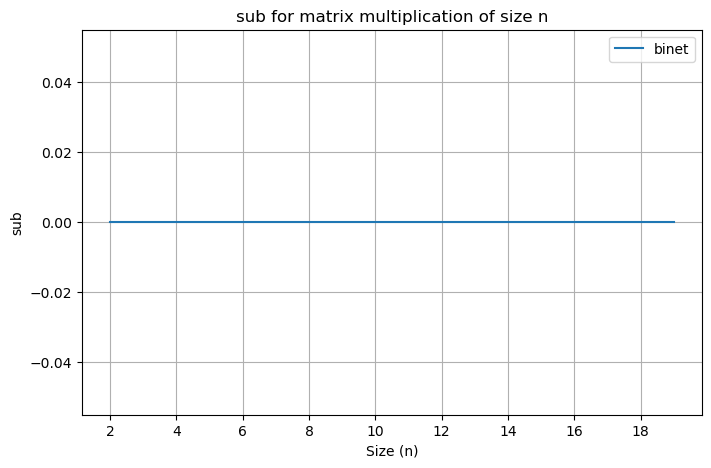

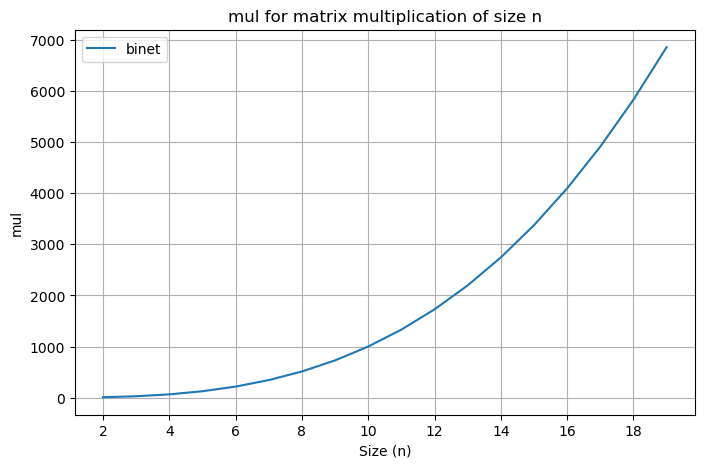

In [ ]:
plot_metric(avg_df, 'add')
plot_metric(avg_df, 'sub')
plot_metric(avg_df, 'mul')

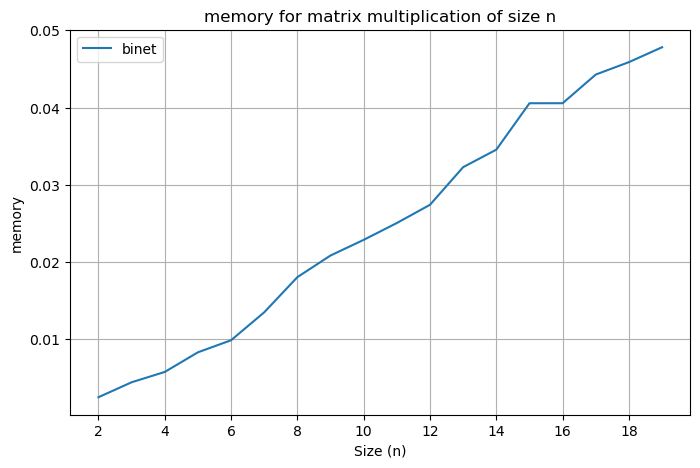

In [ ]:
plot_metric(avg_df, 'memory')

In [ ]:
functions = [strassen_without_padding_benchmark]
names = ["Strassen bez paddingu"]

stra_df = create_statistics(1, 201, 5, functions=functions, names=names)

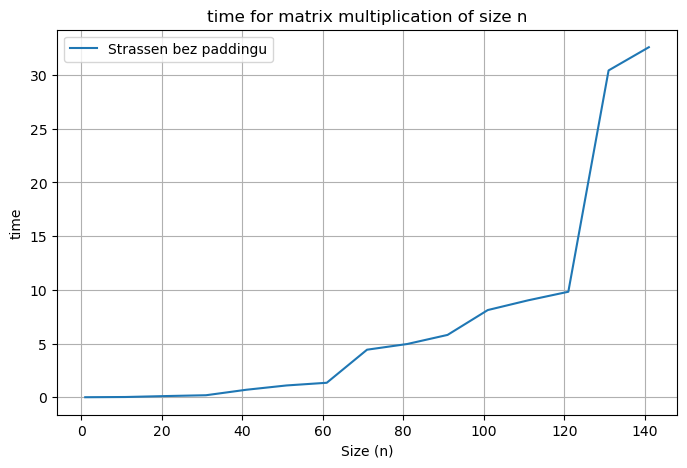

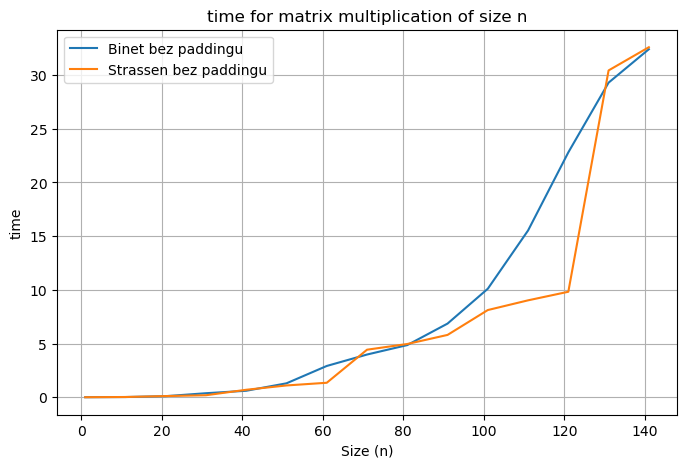

In [ ]:
plot_metric(avg_df[avg_df["method"] == "Strassen bez paddingu"], 'time')
plot_metric(avg_df, 'time')

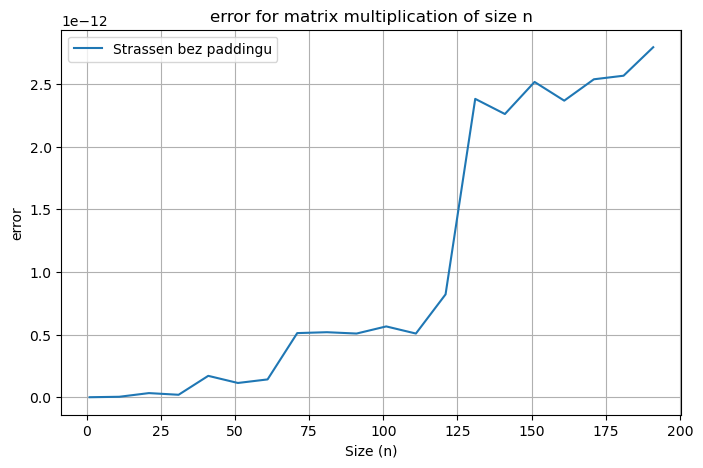

In [ ]:
plot_metric(stra_df[stra_df["method"] == "Strassen bez paddingu"], 'error')

In [2]:
from stats import benchmark_Ai
ai_df = create_statistics_for_ai(10000, 1)

In [3]:
ai_df

,size,method,time,memory,error,add,sub,mul
0,20,Ai,0.017376,0.025763,7.771561e-16,280.0,258.0,76.0
1,400,Ai,1.036735,0.138807,1.598721e-14,26959.0,24631.0,5776.0
2,8000,Ai,61.919847,2.417107,3.765876e-13,2143919.0,1944151.0,438976.0


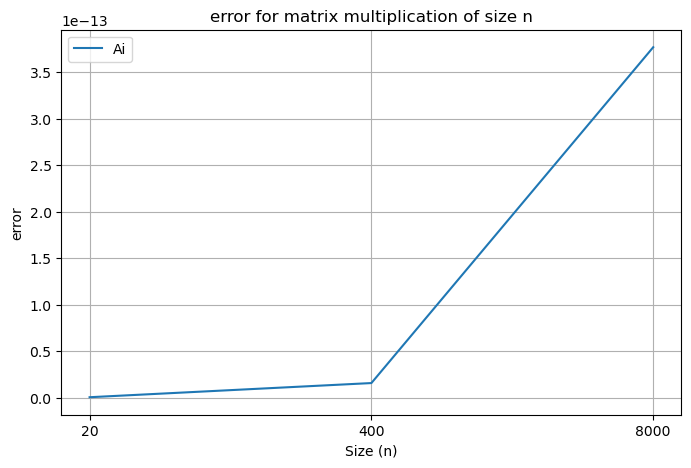

In [9]:
plot_metric(ai_df, "error")

In [11]:
from math import sqrt
from scipy.optimize import curve_fit

def fit_curve(name1, name2, dataframe):
    x_data = [i for i in dataframe[name1]]
    y_data = dataframe[name2]
    def power_law(x, a, k):
        return a*x**k

    params, covariance = curve_fit(power_law, x_data, y_data, p0=[1.0, 1.0])
    a, k = params
    print(f"Exponent k is approximately: {k}")
    print(f"contant a is approximately: {a}")
    return a, k

In [ ]:
stra_df = df.read_csv("stra.csv", sep=',')

In [ ]:
stra_df

,Unnamed: 0,size,method,time,memory,error,add,sub,mul
0,0,1,Strassen bez paddingu,0.000022,0;0005950927734375,0;0,0;0,0;0,1;0
1,1,11,Strassen bez paddingu,0.024397,0;02538928985595703,3;552713678800501e-15,1898;0,612;0,1101;0
2,2,21,Strassen bez paddingu,0.123271,0;0774871826171875,3;2862601528904634e-14,13536;0,4884;0,6651;0
3,3,31,Strassen bez paddingu,0.184836,0;16918792724609374,1;9539925233402755e-14,33556;0,8112;0,22349;0
4,4,41,Strassen bez paddingu,0.670110,0;2969673156738281,1;7053025658242404e-13,95852;0,36588;0,42651;0
5,5,51,Strassen bez paddingu,1.039289,0;46213111877441404,1;1368683772161603e-13,160048;0,53310;0,82684;0
6,6,61,Strassen bez paddingu,1.362930,0;664425277709961,1;4210854715202004e-13,237442;0,62184;0,147887;0
7,7,71,Strassen bez paddingu,4.286505,0;9027019500732422,5;115907697472721e-13,537096;0,229698;0,197590;0
8,8,81,Strassen bez paddingu,5.134098,1;1774715423583983,5;186961971048731e-13,675564;0,265716;0,283551;0
9,9,91,Strassen bez paddingu,5.885477,1;4912643432617188,5;080380560684716e-13,852472;0,277968;0,443801;0


In [ ]:
a, k = fit_curve("size", "time", stra_df[stra_df["method"] == "Strassen bez paddingu"])

Exponent k is approximately: 2.3862871199783604
contant a is approximately: 0.0001947274504285576


In [ ]:
stats_df = df.read_csv("stats1.csv", sep=';')

In [ ]:
stats_df

,Unnamed: 0,size,method,time,memory,error,add,sub,mul
0,0,1,Binet bez paddingu,0.000026,0.000652,0.000000e+00,0.0,0.0,1.0
1,1,1,Strassen bez paddingu,0.000024,0.000656,0.000000e+00,0.0,0.0,1.0
2,2,11,Binet bez paddingu,0.017312,0.019383,8.881784e-16,1210.0,0.0,1331.0
3,3,11,Strassen bez paddingu,0.020610,0.024152,8.437695e-15,1898.0,612.0,1101.0
4,4,21,Binet bez paddingu,0.098525,0.045759,2.664535e-15,8820.0,0.0,9261.0
5,5,21,Strassen bez paddingu,0.107745,0.077608,1.865175e-14,13536.0,4884.0,6651.0
6,6,31,Binet bez paddingu,0.372511,0.091989,3.552714e-15,28830.0,0.0,29791.0
7,7,31,Strassen bez paddingu,0.184589,0.169173,2.486900e-14,33556.0,8112.0,22349.0
8,8,41,Binet bez paddingu,0.602082,0.159185,7.105427e-15,67240.0,0.0,68921.0
9,9,41,Strassen bez paddingu,0.694170,0.297468,8.171241e-14,95852.0,36588.0,42651.0


In [ ]:
a, k = fit_curve("size", "time", stats_df[stats_df["method"] == "Binet bez paddingu"])

Exponent k is approximately: 3.2846451131830943
contant a is approximately: 3.004225437641912e-06


In [13]:
ai_df

,size,method,time,memory,error,add,sub,mul
0,20,Ai,0.017376,0.025763,7.771561e-16,280.0,258.0,76.0
1,400,Ai,1.036735,0.138807,1.598721e-14,26959.0,24631.0,5776.0
2,8000,Ai,61.919847,2.417107,3.765876e-13,2143919.0,1944151.0,438976.0


In [15]:
def fit_curve2(name1, name2, dataframe):
    x_data = [sqrt(int(i)) for i in dataframe[name1]]
    y_data = dataframe[name2]
    def power_law(x, a, k):
        return a*x**k

    params, covariance = curve_fit(power_law, x_data, y_data, p0=[1.0, 1.0])
    a, k = params
    print(f"Exponent k is approximately: {k}")
    print(f"contant a is approximately: {a}")
    return a, k

a, k = fit_curve2("size", "time", ai_df[ai_df["method"] == "Ai"])

Exponent k is approximately: 2.730393683839443
contant a is approximately: 0.0002906322119776303
